# IMPORTER LES LIBRAIRIES

In [2]:
# Importer les librairies Pandas
import pandas as pd
import numpy as np

# Importer les librairies pour la visualisation
# seaborn = librairies pour data visualisation
import seaborn as sns

# Dépendances necessaires pour seaborn
# 1/ La librairie pyplot de matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

# Fonction spéciale de Jupyter pour afficher les plots sur Jupyter Notebook
%matplotlib inline

# Importer stats de la librairie Scipy
from scipy import stats
# Importer la fonction 'norm' de la librairie Scipy.stats
from scipy.stats import norm

# Importer la fonction StandardScaler de sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Gérer les warnings
import warnings
warnings.filterwarnings('ignore')

# IMPORTER LES DONNÉES

In [3]:
# Importer les données
# index_col=0, veut dire que la première colonne et l'index des colonne
# Si on ne le met pas Pandas va ajouter un index au dataframe (= valeur incrementiel)
# df = pd.read_csv("dataset/diabetes.csv", index_col=0, encoding="latin-1")
df = pd.read_csv("dataset/diabetes.csv", encoding="latin-1")

# AFFICHER LES INFORMATIONS

In [16]:
# Afficher le nombre de ligne / features du DataFrame
print("\n----------------- Shape -------------------")
print (df.shape)
print ("Le dataset importé a {} data points avec {} variables chacun.".format(*df.shape))


----------------- Shape -------------------
(768, 9)
Le dataset importé a 768 data points avec 9 variables chacun.


In [31]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Afficher les (5) premières lignes du DataFrame
print("\n------------------ Head -------------------")
print (df.head())

# Afficher les infos du DataFrame
print("\n------------------ Info -------------------")
print (df.info())

# Afficher les infos statistiques du DataFrame
print("\n---------------- Describe -----------------")
print (df.describe())


------------------ Head -------------------
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

------------------ Info -------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure  

In [20]:
# Minimum price of the data
minimum_price = np.amin(df['BloodPressure'])

# Maximum price of the data
maximum_price = np.amax(df['BloodPressure'])

# Mean price of the data
mean_price = np.mean(df['BloodPressure'])

# Median price of the data
median_price = np.median(df['BloodPressure'])

# Standard deviation of prices of the data
std_price = np.std(df['BloodPressure'])

# Show the calculated statistics
print("Statistics for BloodPressure :")
print("Minimum BloodPressure : {}".format(minimum_price)) 
print("Maximum BloodPressure : {}".format(maximum_price))
print("Mean BloodPressure: {}".format(mean_price))
print("Median BloodPressure : {}".format(median_price))
print("Standard deviation of BloodPressure : {}".format(std_price))

Statistics for BloodPressure :
Minimum BloodPressure : 0
Maximum BloodPressure : 122
Mean BloodPressure: 69.10546875
Median BloodPressure : 72.0
Standard deviation of BloodPressure : 19.343201628981696


In [46]:
# Afficher les infos statistiques d'une feature
print (df['BloodPressure'].describe())

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


In [47]:
# Afficher la distribution d'une feature
print("\n--------------- Distribution --------------")
print (df['Outcome'].value_counts())
print("\n------------- % Distribution --------------")
print (df['Outcome'].value_counts()/len(df))


--------------- Distribution --------------
0    500
1    268
Name: Outcome, dtype: int64

------------- % Distribution --------------
0    0.651042
1    0.348958
Name: Outcome, dtype: float64


In [9]:
# Afficher le types de données par features
print (df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [10]:
# Retourner la valeur la plus présente dans une feature
print("\n------------------ Mode -------------------")
print ('mode: ', df['Outcome'].mode())


------------------ Mode -------------------
mode:  0    0
dtype: int64


In [11]:
# Afficher les (5) premières lignes du DataFrame
df.iloc[0:5,:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# VISUALISER LES DONNÉES

## MATRICE DE CORRELATION

In [24]:
# Verifier la correlation entre chaque features

# pearson : standard correlation coefficient
# print ("\n----------------- Pearson -----------------")
# print (df.corr(method='pearson'))
print ("\n---------- Correlation avec Outcome -------")
print ("----------------- Pearson -----------------")
print ("BloodPressure : ", df['BloodPressure'].corr(df['Outcome'], method='pearson'))
print ("Glucose : ", df['Glucose'].corr(df['Outcome'], method='pearson'))
print ("SkinThickness : ", df['SkinThickness'].corr(df['Outcome'], method='pearson'))
print ("Insulin : ", df['Insulin'].corr(df['Outcome'], method='pearson'))
print ("BMI : ", df['BMI'].corr(df['Outcome'], method='pearson'))
print ("DiabetesPedigreeFunction : ", df['DiabetesPedigreeFunction'].corr(df['Outcome'], method='pearson'))

# kendall : Kendall Tau correlation coefficient
# print ("\n----------------- Kendall -----------------")
# print (df.corr(method='kendall'))

# spearman : Spearman rank correlation
# print ("\n---------------- Spearman------------------")
# print (df.corr(method='spearman'))


---------- Correlation avec Outcome -------
----------------- Pearson -----------------
BloodPressure :  0.06506835955033273
Glucose :  0.4665813983068733
SkinThickness :  0.07475223191831942
Insulin :  0.13054795488404788
BMI :  0.2926946626444451
DiabetesPedigreeFunction :  0.1738440656529598


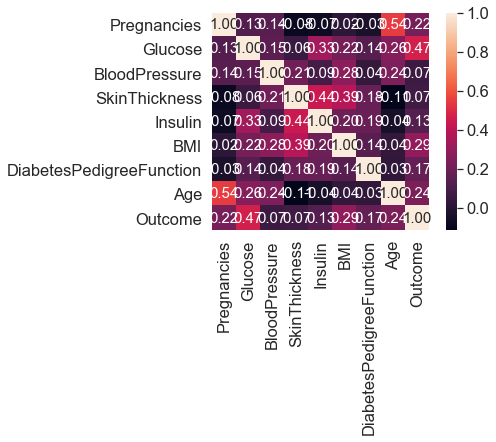

In [29]:
# Calculate and show correlation matrix
cm = np.corrcoef(df.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=df.columns,
                xticklabels=df.columns)

## HISTOGRAMME

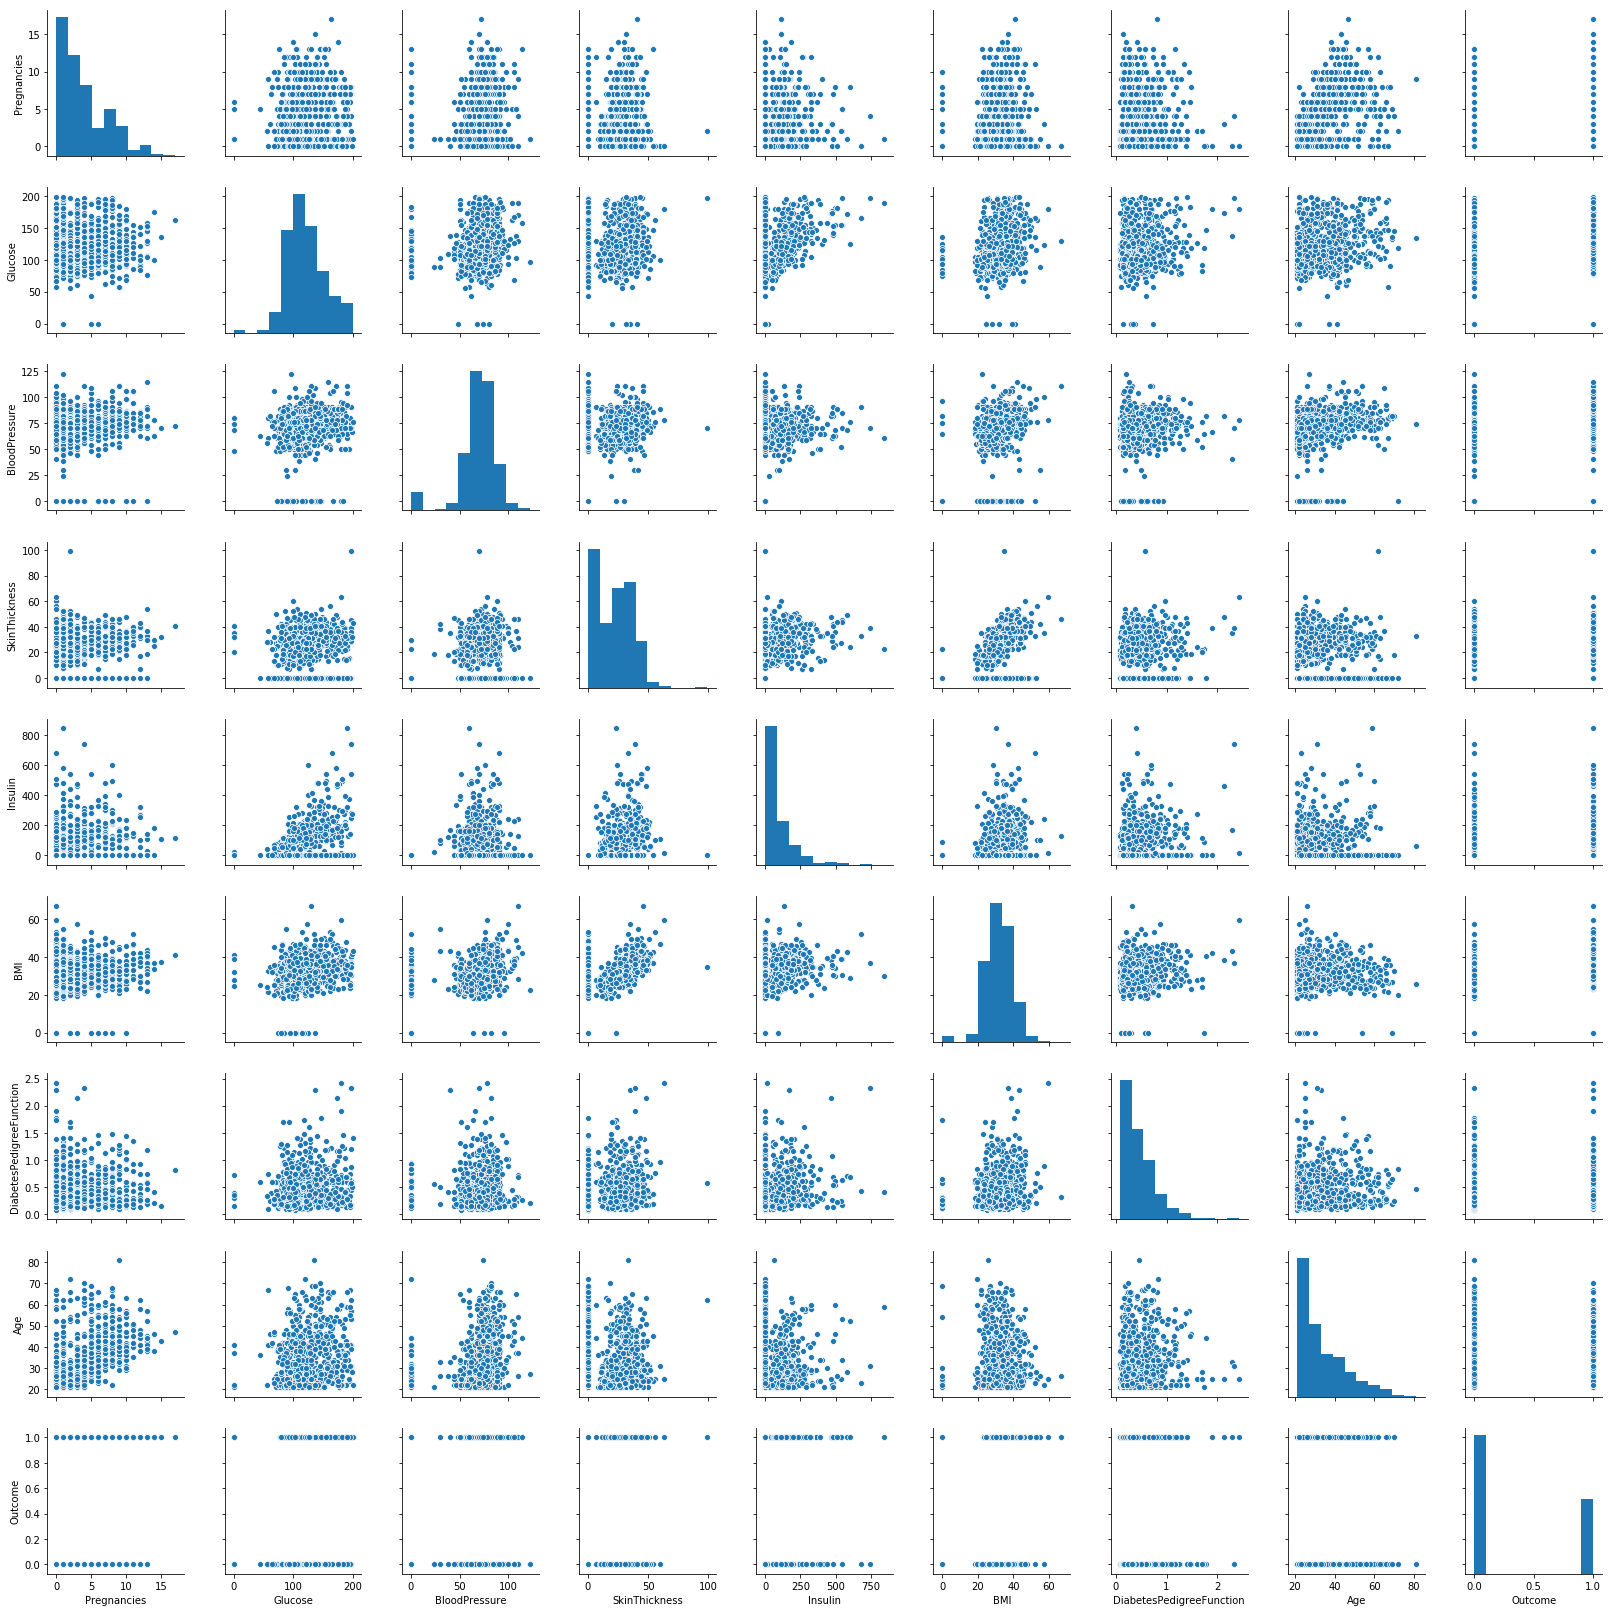

In [12]:
# Calculate and show pairplot
sns.pairplot(df, size=2.5)
plt.tight_layout()

# On peut voir les distributions des features et les relation entre features
# Par exemple on peut voir qu'il apparait y avoir une possible relation 'linéaire' entre 'BMI' et 'Skin thickness'
# On peut aussi voir que 'Glucose', 'BloodPressure' et 'BMI' ont une possible distribution normale mais qavec des outliers


### HISTOGRAMME UNIVARIÉ


-------- Distribution de 'Outcome' -------


Text(0.5, 1.0, "Distribution de 'Outcome'")

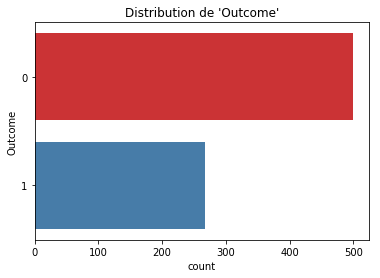

In [69]:
# Afficher le graph de distribution des données d'une feature
# Affichage défini sur y
# Pour un affichage sur x => x = 'Outcome'
print("\n-------- Distribution de 'Outcome' -------")
sns.countplot(y='Outcome', data=df,
                  palette="Set1")
plt.title("Distribution de 'Outcome'")

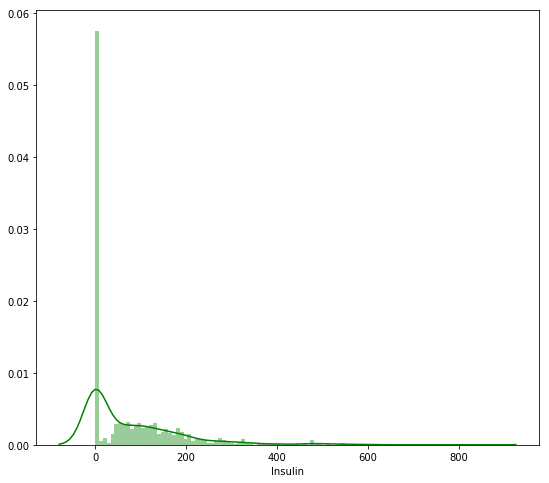

In [70]:
# Afficher le graphique de la distribution d'une feature
plt.figure(figsize=(9, 8))
sns.distplot(df['Insulin'], color='g', bins=100, hist_kws={'alpha': 0.4});

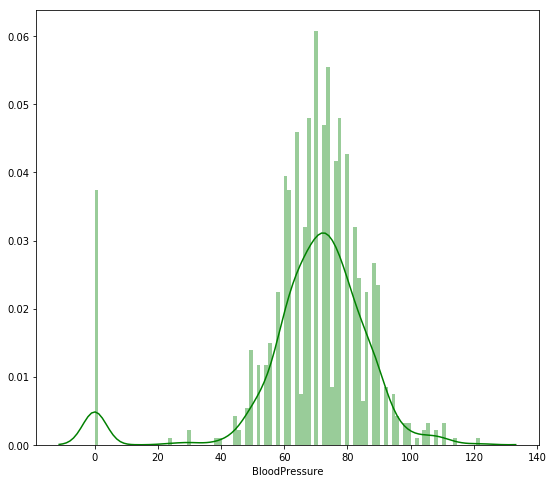

In [71]:
# Afficher le graphique de la distribution d'une feature
plt.figure(figsize=(9, 8))
sns.distplot(df['BloodPressure'], color='g', bins=100, hist_kws={'alpha': 0.4});


-------- Distribution de 'Outcome' -------
------ en fonction de 'BloodPressure' ------


Text(0.5, 1.0, "Distribution de 'Survived' en fonction de 'BloodPressure'")

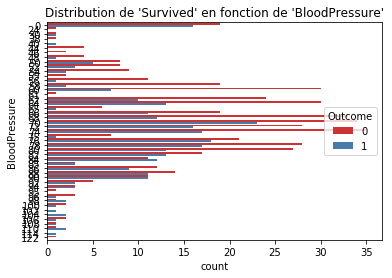

In [72]:
# Afficher le graph des données de la colonne 'Sex' (y=) en fonction de 'Survived' (hue=) 
# Utiliser la palette 'c_palette' définie plus haut
# Affichage défini sur y
# Pour un affichage sur x => x = 'Sex'
print("\n-------- Distribution de 'Outcome' -------")
print("------ en fonction de 'BloodPressure' ------")
sns.countplot(y='BloodPressure', hue='Outcome', data=df,
                  palette="Set1")
plt.title("Distribution de 'Survived' en fonction de 'BloodPressure'")


----- Distribution de 'BloodPressure' -----
--------- pour un Outcome de '0' ----------

----- Distribution de 'BloodPressure' -----
--------- pour un Outcome de '1' ----------


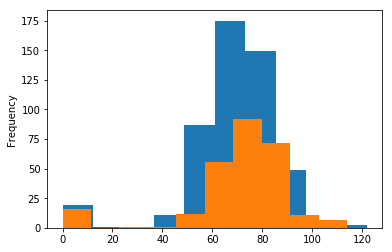

In [73]:
# Tracer une Serie filtrée par une valeur dans une autre feature
# Graph de type "hist" (histogramme)
print("\n----- Distribution de 'BloodPressure' -----")
print("--------- pour un Outcome de '0' ----------")
df[df["Outcome"] == 0]["BloodPressure"].plot(kind="hist")

# Tracer une Serie filtrée par une valeur dans une autre feature
# Graph de type "hist" (histogramme)
print("\n----- Distribution de 'BloodPressure' -----")
print("--------- pour un Outcome de '1' ----------")
df[df["Outcome"] == 1]["BloodPressure"].plot(kind="hist")
plt.show()

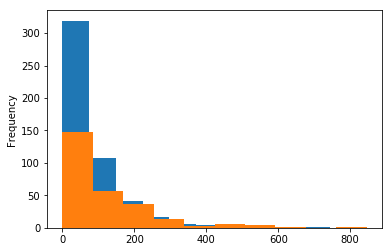

In [74]:
df[df['Outcome'] == 0]['Insulin'].plot.hist()
df[df['Outcome'] == 1]['Insulin'].plot.hist()

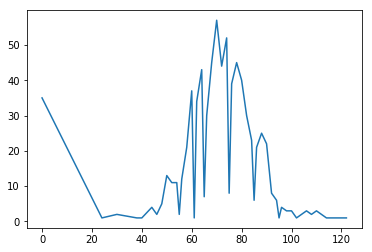

In [75]:
df['BloodPressure'].value_counts().sort_index().plot.line()
plt.show()

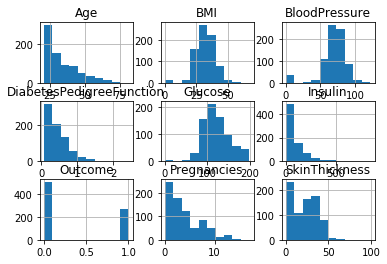

In [76]:
# Univariate Histograms
df.hist()
plt.show()

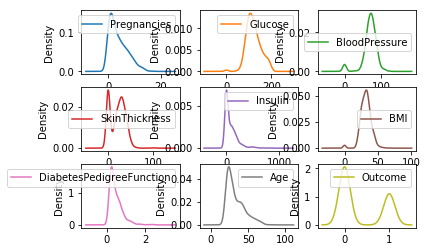

In [77]:
# Univariate Density Plots
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

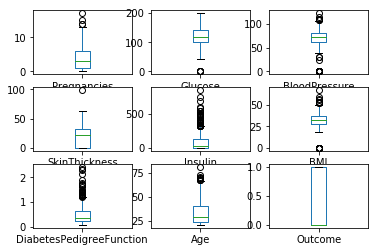

In [78]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

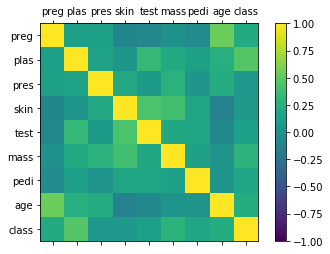

In [79]:
# Correction Matrix Plot
correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

##  BOX PLOT


-------------- Boxplot de 'Insulin' --------------
En ajoutant le points en dehors de la Boxplot (swarmplot())



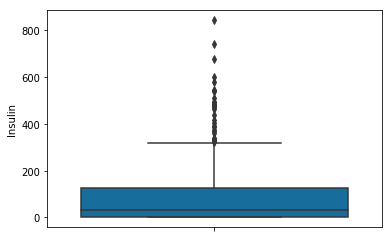

In [80]:
# Afficher le BOX PLOT des données de la colonne 'Age' (y=) 
print("\n-------------- Boxplot de 'Insulin' --------------")
print("En ajoutant le points en dehors de la Boxplot (swarmplot())\n")
sns.boxplot(y='Insulin', data=df,
                palette='colorblind', ax=None, order=None) 
# Ajouter swarmplot
# Draw a categorical scatterplot with non-overlapping points.
# sns.swarmplot(y='BloodPressure', data=df, palette='colorblind', ax=None, order=None)

# NETTOYER LES DONNÉES

In [38]:
# Verifier si il y a des valeurs nulles
print("\n------------ Valeurs manquantes -----------")
print (df.isnull().any())

print("\n------------ Valeurs manquantes -----------")
print (df.isnull().mean().sort_values(ascending=False)*100)


------------ Valeurs manquantes -----------
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

------------ Valeurs manquantes -----------
Outcome                     0.0
Age                         0.0
DiabetesPedigreeFunction    0.0
BMI                         0.0
Insulin                     0.0
SkinThickness               0.0
BloodPressure               0.0
Glucose                     0.0
dtype: float64


### SUPPRIMER LES VALEUR NULLES D'UNE FEATURE ?

In [45]:
# Afficher le nombre de lignes pour la feature 'Insulin'
# On peut utiliser count() car il n'y a pas de valeurs manquantes
# sinon count() renvoi seulement les valeur non manquantes
print (df["Insulin"].count())
print (len(df["Insulin"])

# Afficher le nombre de lignes pour la feature 'Insulin' différent de 0
print (df[df["Insulin"]!= 0]["Insulin"].count())

# Pourcentage de valeurs = 0 dans la feature 'Insulin'
print (df[df["Insulin"]!= 0]["Insulin"].count()/df["Insulin"].count())



SyntaxError: invalid syntax (<ipython-input-45-f269ba7f975c>, line 8)

## CHOISIR DES LIGNES SPECIFIQUES

In [24]:
# Créer une série avec des conditions particulières
# Ici 'Insulin' doit être différent de '0'
df_good = df["Insulin"]!= 0

# Créer un DataFrame et y insérer la Serie créée au dessus
filter_df = df[df_good]

# Afficher les (5) premières lignes
print (filter_df.head())

             Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Pregnancies                                                         
1                 89             66             23       94  28.1   
0                137             40             35      168  43.1   
3                 78             50             32       88  31.0   
2                197             70             45      543  30.5   
1                189             60             23      846  30.1   

             DiabetesPedigreeFunction  Age  Outcome  
Pregnancies                                          
1                               0.167   21        0  
0                               2.288   33        1  
3                               0.248   26        1  
2                               0.158   53        1  
1                               0.398   59        1  


In [ ]:
# Faire une copy pour travailler dessus
training_df = df.copy()

# SPILITTER LE DATAFRAME

In [32]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(df, df['Outcome'], test_size=0.2, random_state = 42)

In [34]:
print("\n------------------ X_train ----------------")
print (X_train.head())
print("\n------------------- X_test ----------------")
print (X_test.head())
print("\n------------------ y_train ----------------")
print (y_train.head())
print("\n------------------- y_test ----------------")
print (y_test.head())


------------------ X_train ----------------
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   

     DiabetesPedigreeFunction  Age  Outcome  
60                      0.304   21        0  
618                     1.282   50        1  
346                     0.654   22        0  
294                     0.254   65        0  
231                     0.238   46        1  

------------------- X_test ----------------
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33      190  34.0   
324            2      112             75 